In [1]:
root_path = "/tf/home/sergio/Tesis"

In [2]:
import sys
sys.path.append(root_path+"/TinyYOLOv3-Pedestrian-Detection")

from YOLOfunctional import TinyYOLOv3_functional,nms_layer
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from tensorflow.python.tools import freeze_graph
#from skimage.io import imread,imshow
#from skimage.transform import resize 
import time
#from tensorflow.compat.v1.image import decode_image
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import os

In [3]:
#anchors =[[10/416,14/416],[23/416,27/416],[37/416,58/416],[81/416,82/416],[135/416,169/416],[344/416,319/416]]
anchors =[[0.02078,0.049],[0.0426,0.128],[0.08523,0.19356],[0.1506,0.4163],[0.27835,0.58651],[0.5632,0.78614]]

model = TinyYOLOv3_functional(anchor_boxes = anchors,num_classes=0,training=False)
current_directory= '/tf/home/sergio/Tesis/TinyYOLOv3-Pedestrian-Detection/Deployment'
model.load_weights(current_directory+'/weights_fine_tuning_functional/rmsprop_2211_60_70_epochs')

In [4]:
for i in model.layers:
    print(i)

In [5]:
file = tf.keras.utils.get_file(
    "persons.jpg",
    "https://www.saltwire.com/media/photologue/photos/cache/STJ-A01-28102019-RawlinsCrossPedestrians3_large.jpg")




image = file
img_raw = tf.image.decode_image(open(image, 'rb').read(), channels=3)
img = tf.expand_dims(img_raw, 0)
_,height,width,_ =img.shape
img = tf.image.resize(img, (416, 416))/255

In [6]:
width

800

In [7]:
#%timeit model(img)

In [8]:
pred = model(img).numpy()

In [9]:
pred

array([[[-8.25415254e-02, -1.75954714e-01,  8.71011019e-02,
          1.84976593e-01,  2.15076373e-12],
        [-1.78222686e-01, -8.96310881e-02,  1.80565447e-01,
          9.18944851e-02,  1.51224072e-13],
        [-4.18501705e-01, -1.09689429e-01,  4.32323426e-01,
          1.18184686e-01,  2.02177476e-11],
        ...,
        [ 9.62049186e-01,  9.57455993e-01,  9.62066829e-01,
          9.67406034e-01,  9.78640310e-06],
        [ 9.21405911e-01,  8.83520484e-01,  1.00336516e+00,
          1.04125202e+00,  1.80063341e-06],
        [ 9.04449821e-01,  8.75538290e-01,  1.01995122e+00,
          1.04843390e+00,  1.38687949e-06]]], dtype=float32)

In [10]:
boxes = pred[0,np.where(pred[:,:,4]>0.5)[1],:][:,:4]
boxes[:,[0,2]] = boxes[:,[0,2]]*width
boxes[:,[1,3]] = boxes[:,[1,3]]*height

In [11]:
boxes

array([[553.49744,  90.83172, 679.97644, 408.68378],
       [322.45587, 152.51254, 416.73108, 429.61047],
       [387.7771 , 146.28021, 480.0877 , 430.24506],
       [497.75482, 169.53284, 611.6754 , 408.3131 ],
       [198.15695, 175.10213, 297.7437 , 487.88773],
       [ 64.80302, 167.65694, 120.33856, 285.9292 ]], dtype=float32)

In [12]:
import cv2
BOX_COLOR = (0, 0, 255)
#BOX_COLOR = (255,0,0)
def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2):
    
    #x_center, y_center, width, height = bbox#*416
    x_min,y_min,x_max,y_max=bbox
    #x_min = int(x_center-(width//2))
    #y_min = int(y_center-(height//2))
    #x_max = int(x_center+(width//2))
    #y_max = int(y_center+(height//2))
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img

def generate_image(image,bboxes):
    img = image.copy()
    for idx, bbox in enumerate(bboxes):
        #print(idx)
        img = visualize_bbox(img, bbox)
    #plt.imshow(img)
    return img
    
def new_frame(image,bboxes,color=BOX_COLOR):
    img = image.copy()
    for idx, bbox in enumerate(bboxes):
        #print(idx)
        img = visualize_bbox(img, bbox,color=color)
    return img

In [13]:
aux = new_frame(img_raw.numpy(),boxes,color=BOX_COLOR)

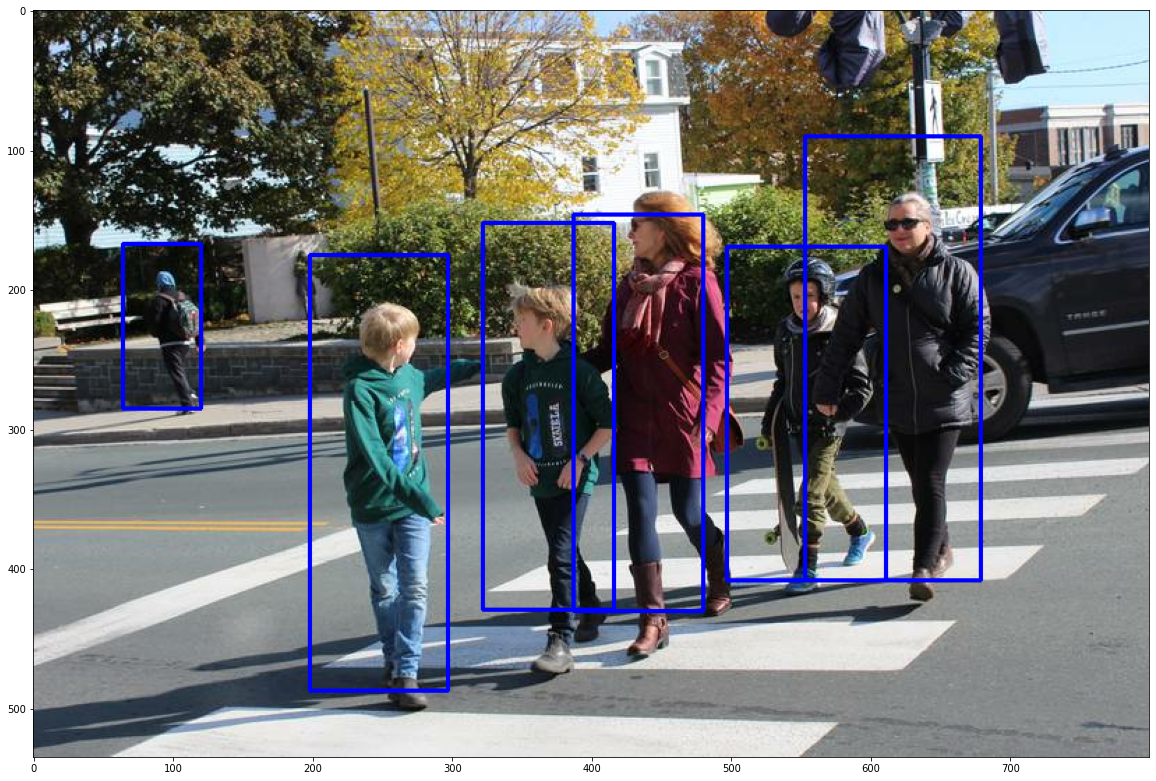

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

import matplotlib.pyplot as plt
plt.imshow(aux)

In [15]:
os.chdir('/tf/home/sergio/Tesis/TinyYOLOv3-Pedestrian-Detection/Deployment')
!mkdir -p saved_model_functional_production_with_NMS
model.save('saved_model_functional_production_with_NMS/my_model') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model_functional_production_with_NMS/my_model/assets
